# Try PyGMT online

This Jupyter lab environment has the latest PyGMT installed. You can try PyGMT with no extra install required.

**NOTE:** Any changes will be lost when the Jupyter lab is closed. Select "File"->"Download" to save notebooks to your computer.

To execute the code cells, select it and type `Shift + Enter` or click on the "Run" ► button in the menu bar. 

For tutorials and more examples, visit the official website: https://www.pygmt.org

## Note for Google Colab users

Google Colab doesn't have PyGMT and its dependencies installed. You need to run the following commands to install them once.

Be patient! Installation may take a few minutes. In fact, some experiments showed that Colab needs about 8 minutes to install everything. Take the opportunity to read about PyGMT.

Note that when you run the commands below, the sequence '%%capture' will prevent the cell from showing what the VM is running (too many lines!). However, if you want to follow the process, just comment out this line with a '#'.

In [1]:
%%capture
!sudo apt update 
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

# and last but not least
!pip install pygmt

## Loading the PyGMT package

You can load PyGMT by importing the `pygmt` Python package. Most GMT processing modules will be avialable as functions in this package. The plotting modules are methods of the `pygmt.Figure` class.

In [2]:
# Load the PyGMT package. This only needs to be run once
import pygmt

## Check the installed environment

Before starting, let's first check the current environment:

In [3]:
pygmt.show_versions()

PyGMT information:
  version: v0.5.0
System information:
  python: 3.7.13 (default, Apr 24 2022, 01:04:09)  [GCC 7.5.0]
  executable: /usr/bin/python3
  machine: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
Dependency information:
  numpy: 1.21.6
  pandas: 1.3.5
  xarray: 0.20.2
  netCDF4: 1.5.8
  packaging: 21.3
  ghostscript: 9.26
  gmt: 6.5.0_9dae385_2022.06.19
GMT library information:
  binary dir: /usr/bin
  cores: 2
  grid layout: rows
  library path: /usr/local/lib/libgmt.so
  padding: 2
  plugin dir: /usr/local/lib/gmt/plugins
  share dir: /usr/local/share
  version: 6.5.0


## Example 1

All figure generation in PyGMT is handled by the `pygmt.Figure` class. 
It has methods to add layers to your figure, like a basemap, coastlines, etc.

We start a new figure by creating an instance of `pygmt.Figure`:

In [7]:
fig = pygmt.Figure()

We add elements to the figure using its methods. For example, lets add the global coastlines to a 15 cm wide map using the Hammer projection (**H**). 
Our figure will also have a nice frame with automatic ticks. Finally, the 'xshift' shifts the figure 1 cm to the right..

In [10]:
fig.coast(region='g', projection='H15c', frame=True, land='lightbrown', water='lightblue', xshift='1c')

You can see a preview of the figure directly in the Jupyter notebook using `fig.show()`.

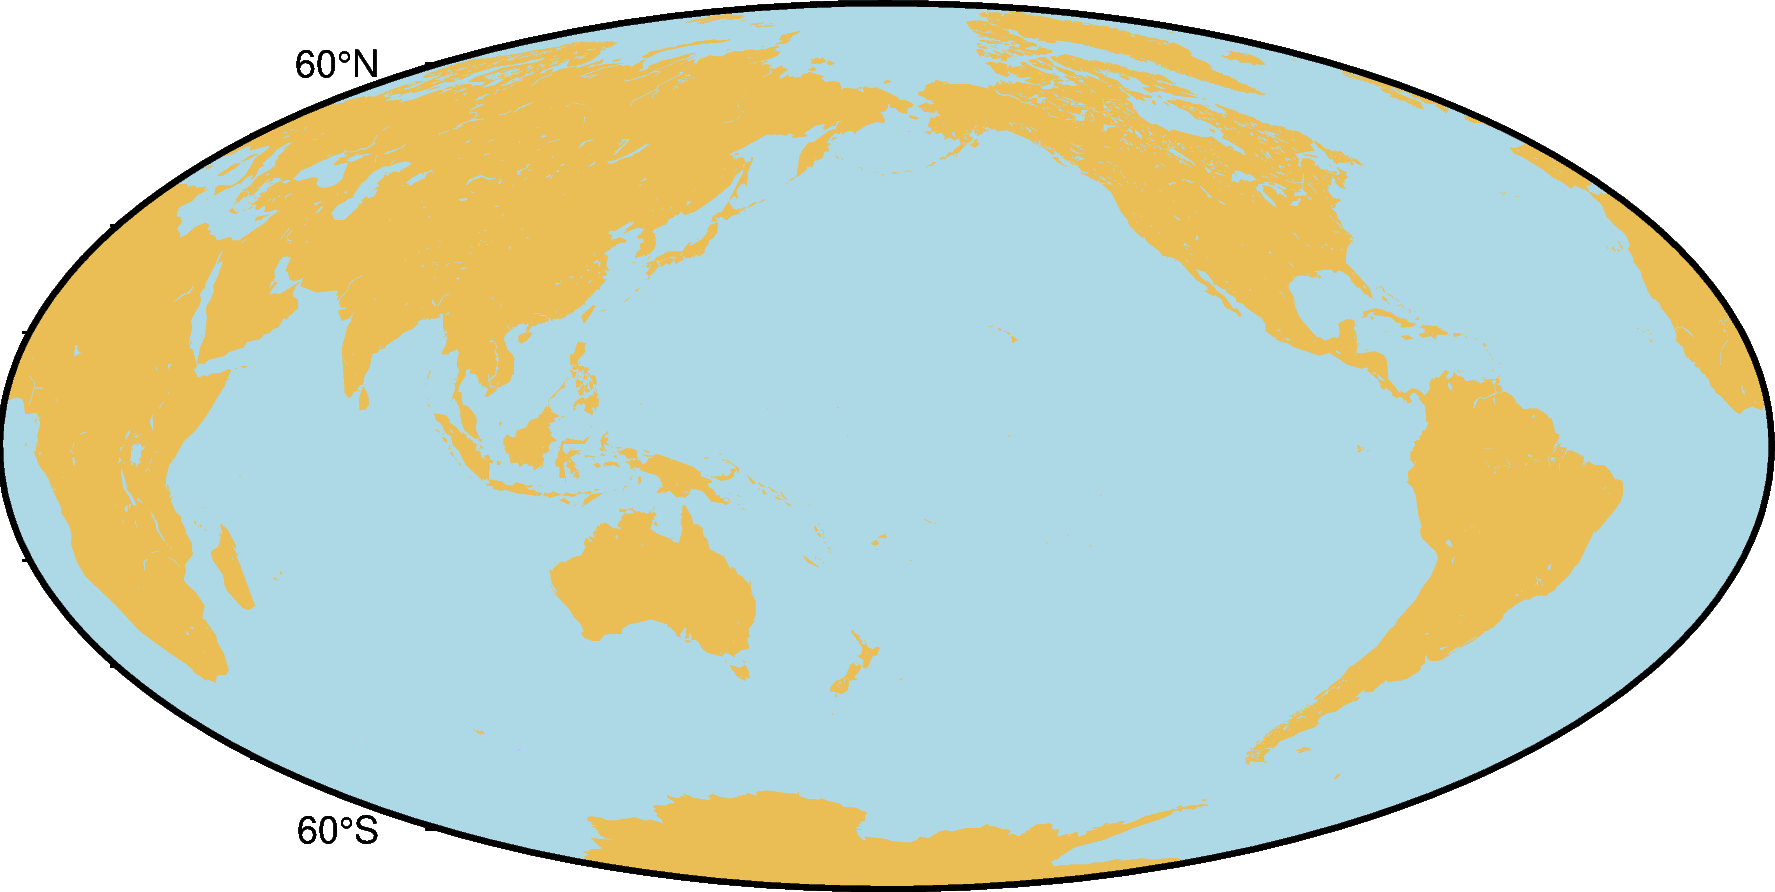

In [11]:
fig.show()

You can also save your figure in several graphics formats (e.g., png, pdf, jpg) using `fig.savefig()`:

In [12]:
fig.savefig("global.png")

## Example 2

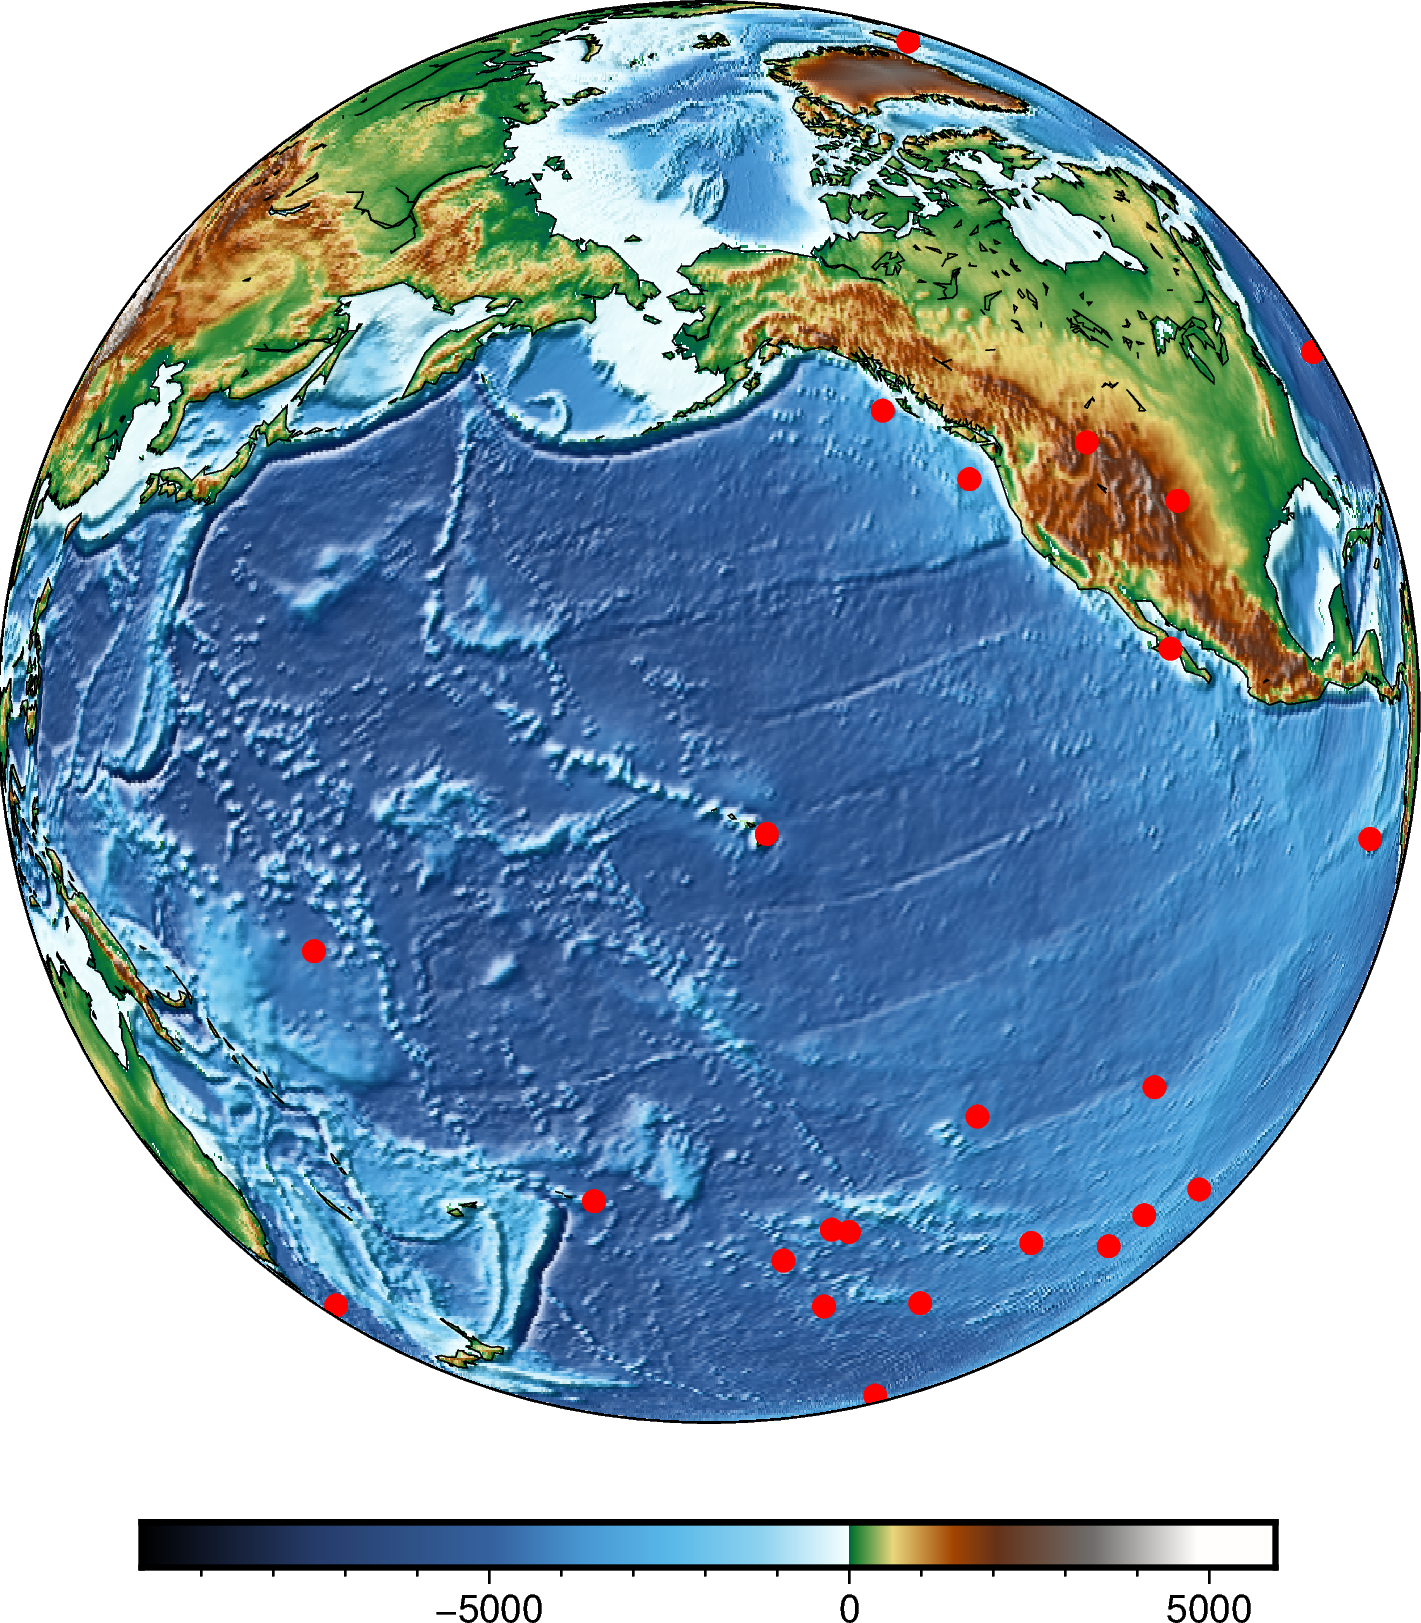

In [16]:
fig = pygmt.Figure()
fig.basemap(region='g', projection='G200/30/12c', frame=True, xshift='1c')
fig.grdimage('@earth_relief_20m', cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', color='red')
fig.colorbar()
fig.show()

## Experiment for yourself

Try running different things in the cells below or edit and rerun the cells above.

In [ ]:
fig = pygmt.Figure()
# Any Python codes here
fig.show()